In [2]:
import scipy.io as sio
from pyleoclim import Spectral

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/Users/kurtwogau/Documents/TimesSeries/2500yrData2.csv")

In [3]:
data.head()

,Yr BP,Sr/Fe,Ti,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1999.97,0.410811,617.0,NaN,NaN,NaN,NaN
1,1999.78,0.374046,662.0,NaN,NaN,NaN,NaN
2,1999.59,0.336861,618.0,NaN,NaN,NaN,NaN
3,1999.41,0.409222,608.0,NaN,NaN,NaN,NaN
4,1999.22,0.384615,635.0,NaN,NaN,NaN,NaN


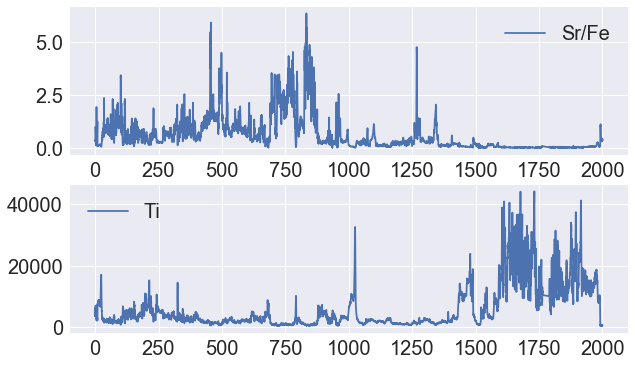

In [4]:
data = pd.read_csv("2500yrData2.csv")
x1 = data['Sr/Fe'].values
y1 = data['Ti'].values
t = data['Yr BP'].values

sns.set(style="darkgrid", font_scale=2)
fig = plt.figure(figsize=[10, 6])
ax1 = plt.subplot(2, 1, 1)
ax1.plot(t, x1, label='Sr/Fe')
ax1.legend()
ax2 = plt.subplot(2, 1, 2)
ax2.plot(t, y1, label='Ti')
ax2.legend()

In [ ]:
tau = np.linspace(np.min(t), np.max(t), np.size(t))
s0 = 2*np.median(np.diff(t))
nv = 12
a0 = 2**(1/nv)
noct = np.floor(np.log2(np.size(t)))-1
scale = s0*a0**(np.arange(noct*nv+1))
freqs = 1/scale[::-1]
res_xwc = Spectral.xwc(
    x1, t, y1, t, tau=tau, nMC=0, freqs=freqs
)

In [3]:
period_ticks = [1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
ax = Spectral.plot_coherence(res_xwc, figsize=[15, 10],
                             levels=np.linspace(0, 1., 41),
                             tick_range=np.linspace(0, 1., 11),
                             clr_map='RdBu_r',
                             yticks=period_ticks,
                             ylim=[np.min(period_ticks), np.max(res_xwc.coi)],
                             xlabel='Time (secs)',
                             plot_cone=True,
                             plot_signif=False,
                             # adjust arrows
                             skip_x=100,
                             skip_y=6,
                             scale=35,
                             width=0.004
                            )

NameError: name 'res_xwc' is not defined